In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('BlackFriday.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Association Rule Mining via Apriori Algorithm

## 1. transaction dataset (without weight)

In [3]:
df_sort = df.sort_values(by=['User_ID'])

In [4]:
user =0
trans=list()
temp=list()
for i in range (len(df_sort)):
    if user !=df_sort.iloc[i]['User_ID']:
        user = df_sort.iloc[i]['User_ID']
        trans.append(temp)
        temp=[]
    temp.append(df_sort.iloc[i]['Product_ID'])
del trans[0]    

## 2. Apriori algorithm

### Support
Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. 

### Confidence
Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. 

### Lift
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B)

Lift basically tells us that the likelihood of buying a Burger and Ketchup together is 3.33 times more than the likelihood of just buying the ketchup. A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

it tells us how much more likely it is to buy ketchup GIVEN THAT burgers are bought as well



In [6]:
from akapriori import apriori
transactions =trans
rules = apriori(transactions, support=0.01, confidence=0.5)
rules_sorted = sorted(rules, key=lambda x: (x[4], x[3], x[2]), reverse=True) # ORDER BY lift DESC, confidence DESC, support DESC

In [7]:
result=pd.DataFrame(list(rules_sorted))[:150]
result[0]=result[0].apply(lambda x: list(x)[0])
result[1]=result[1].apply(lambda x: list(x)[0])
result[2]=result[2].apply(lambda x: float(x))
result[3]=result[3].apply(lambda x: float(x))
result[4]=result[4].apply(lambda x: float(x))

In [119]:
# prod=list(df['Product_ID'].unique())
# prod_dic={}
# for i in range(len(prod)):
#     prod_dic[prod[i]]=str(i)
# result_=result.replace({0: prod_dic}).replace({1: prod_dic})

In [8]:
result_=result.rename(columns={0:'LHS',1:'RHS',2:'Support',3:'Confidence',4:'Lift'})

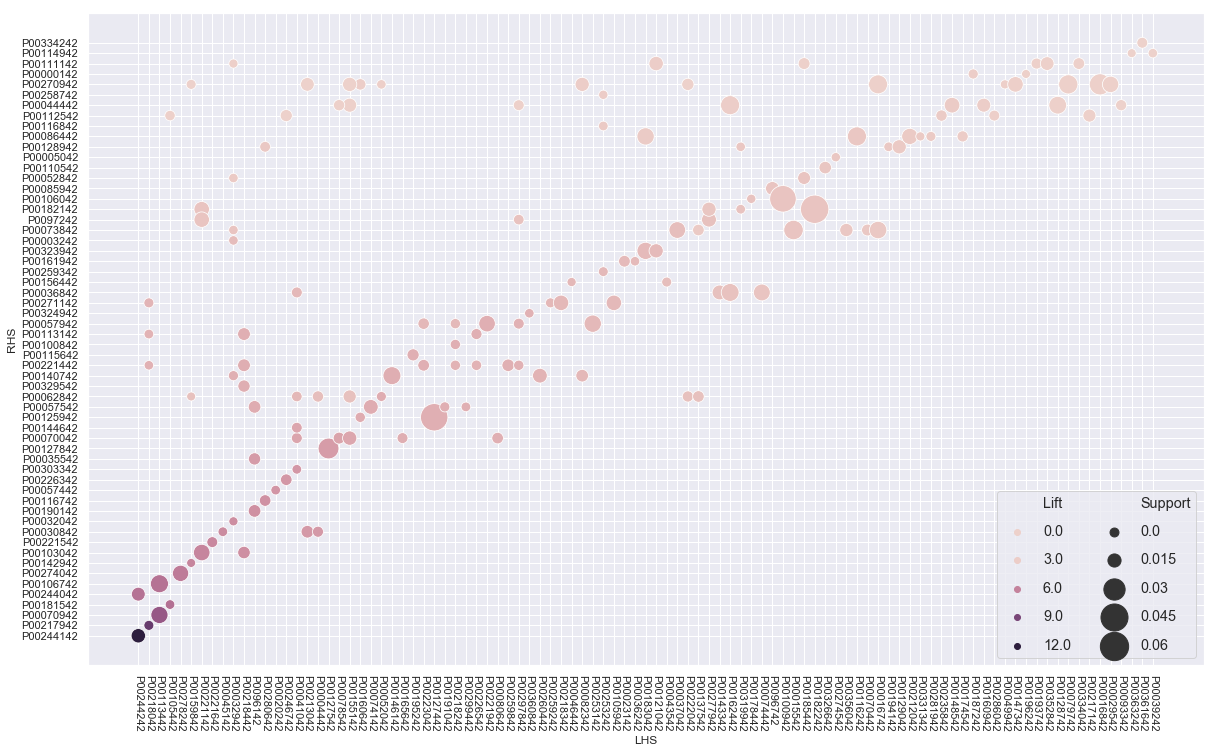

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
#
plt.subplots(figsize=(20, 12))
ax = sns.scatterplot(x='LHS', y='RHS',
                   hue='Lift',size='Support',sizes=(80, 800),
                   data=result_)
plt.xticks(rotation=270)
ax.legend(ncol=2, loc=0, frameon=True,fontsize ='large',labelspacing =1)

# category rules

In [11]:
df_1 = df.groupby(['User_ID','Product_Category_1']).count()

In [12]:
costomers=list(df_1.index.levels[0])

In [13]:
label_records=[]
for i in costomers:
    label_records.append(list(df_1.loc[i].index))

# single category

In [14]:
from akapriori import apriori
transactions =label_records
rules = apriori(transactions, support=0.2, confidence=0.5)
rules_sorted = sorted(rules, key=lambda x: (x[4], x[3], x[2]), reverse=True) # ORDER BY lift DESC, confidence DESC, support DESC

In [15]:
result=pd.DataFrame(list(rules_sorted))[:150]

In [16]:
result=pd.DataFrame(list(rules_sorted))[:150]
result[0]=result[0].apply(lambda x: str(list(x)[0]))
result[1]=result[1].apply(lambda x: str(list(x)[0]))
result[2]=result[2].apply(lambda x: float(x))
result[3]=result[3].apply(lambda x: float(x))
result[4]=result[4].apply(lambda x: float(x))

In [19]:
result_=result.rename(columns={0:'LHS',1:'RHS',2:'Support',3:'Confidence',4:'Lift'})

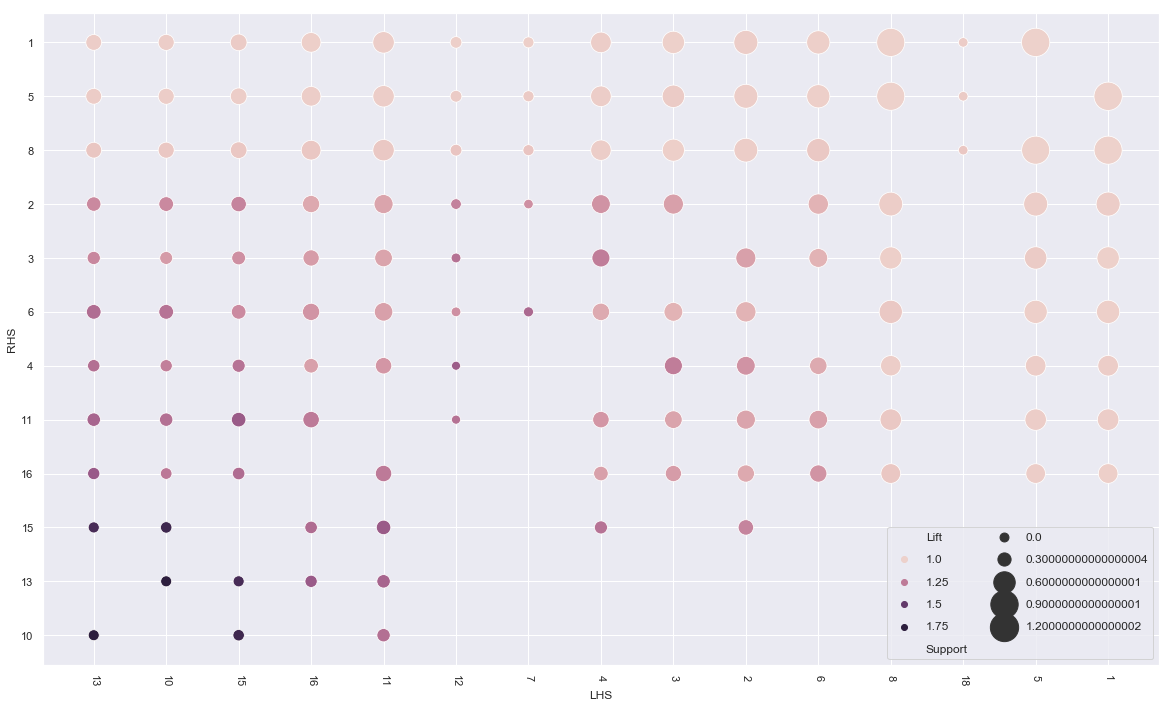

In [18]:
result_=result.rename(columns={0:'LHS',1:'RHS',2:'Support',3:'Confidence',4:'Lift'})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.subplots(figsize=(20, 12))
ax = sns.scatterplot(x='LHS', y='RHS',
                   hue='Lift',size='Support',sizes=(80, 800),
                   data=result_)
plt.xticks(rotation=270)
ax.legend(ncol=2, loc=0, frameon=True,fontsize ='medium',labelspacing =1)
plt.show()

# multi-category

In [20]:
from efficient_apriori import apriori
transactions =label_records
itemset,rules = apriori(transactions,min_support=0.3, min_confidence=0.5)

In [21]:
rules_=[]
for rule in rules:
    temp=[]
    temp.append(rule.lhs)
    temp.append(rule.rhs)
    temp.append(rule.support)
    temp.append(rule.confidence)
    temp.append(rule.lift)
    rules_.append(temp)

In [22]:
rules_sorted = sorted(rules_, key=lambda x: (x[4], x[3], x[2]), reverse=True) 

In [23]:
result=pd.DataFrame(rules_sorted)[:200]

In [24]:
result
result[0]=result[0].apply(lambda x: str(x))
result[1]=result[1].apply(lambda x: str(x))


In [25]:
result_=result.rename(columns={0:'LHS',1:'RHS',2:'Support',3:'Confidence',4:'Lift'})

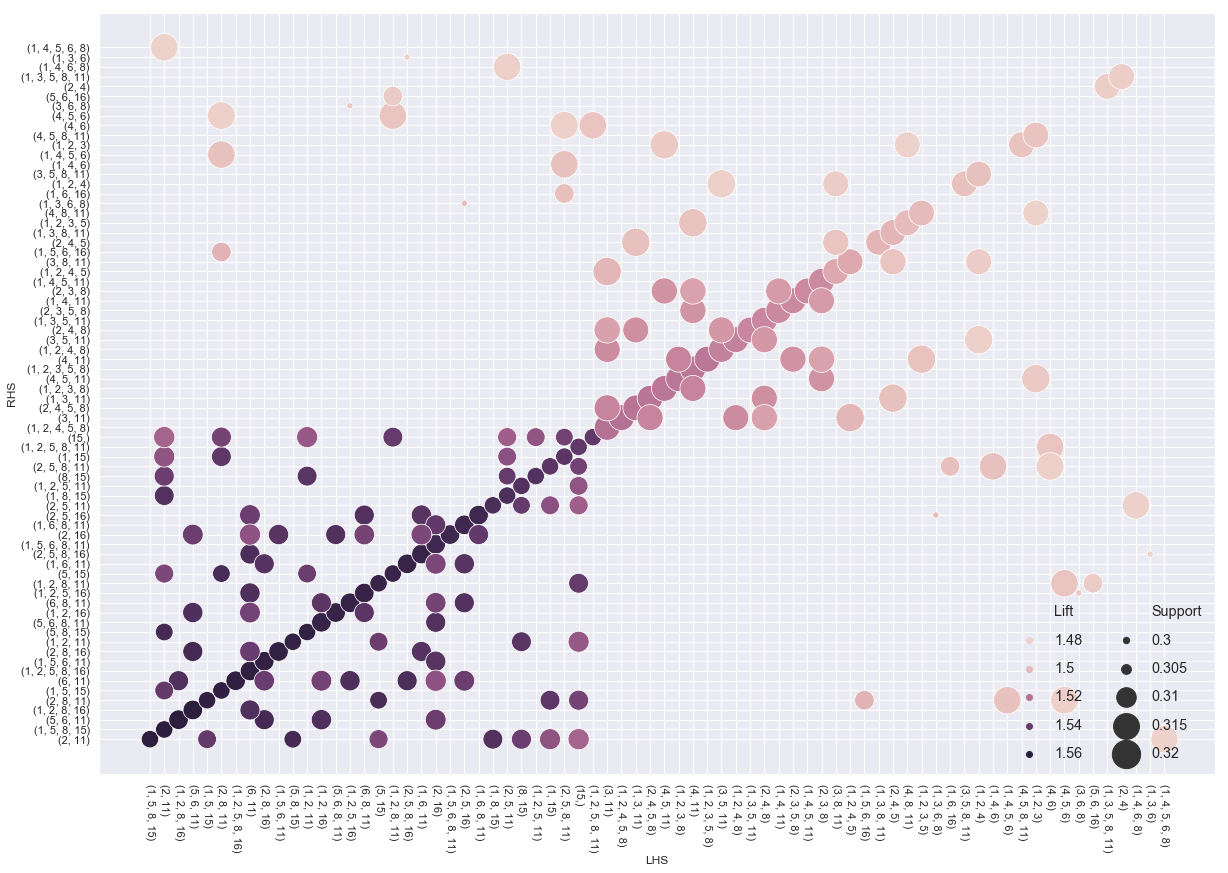

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.subplots(figsize=(20, 14))
ax = sns.scatterplot(x='LHS', y='RHS',
                   hue='Lift',size='Support',sizes=(40, 800),
                   data=result_)
plt.xticks(rotation=270)
ax.legend(ncol=2, loc=0, frameon=False,fontsize ='large',labelspacing =1)
plt.show()